> 201810370311146 Muhammad Ainur Rofiq

> 201810370311180 Muhamad Rizky

# Get Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
cd '/content/gdrive/MyDrive/TKC'

/content/gdrive/MyDrive/TKC


In [20]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"muhammadainurrofiq","key":"791d061966e699642481ed2e6eff9331"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
# Unduh dataset dan ekstraksi zip
!kaggle datasets download -d lomosnone/oxford-102flowers

100% 329M/330M [00:04<00:00, 112MB/s]
100% 330M/330M [00:04<00:00, 75.0MB/s]


In [23]:
'''Unzipping'''

from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('oxford-102flowers.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [28]:
ls

data/  oxford-102flowers.zip  Untitled0.ipynb


In [31]:
cd data

[Errno 2] No such file or directory: 'data'
/content/gdrive/My Drive/TKC/data


In [32]:
ls

test/  train/  valid/


In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.models as models
import matplotlib.pyplot as plt
import time
import math
import tqdm as tqdm
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(os.listdir("/content/gdrive/My Drive/TKC"))

# Any results you write to the current directory are saved as output.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

['Untitled0.ipynb', 'oxford-102flowers.zip', 'data']


device(type='cuda')

In [36]:
os.listdir('/content/gdrive/My Drive/TKC/data')

['test', 'train', 'valid']

In [68]:
data_dir = '/content/gdrive/My Drive/TKC/data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

# Load Data

In [38]:
def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

In [39]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.files = []
        for (dirpath, _, filenames) in os.walk(self.path):
            for f in filenames:
                if f.endswith('.jpg'):
                    p = {}
                    p['img_path'] = dirpath + '/' + f
                    self.files.append(p)
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = self.files[idx]['img_path']
        img_name = img_path.split('/')[-1]
        image = pil_loader(img_path)
        if self.transform:
            image = self.transform(image)
        return image, 0, img_name

# Label Mapping

In [61]:
import json
  
# Data to be written
dictionary ={'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 '2': 'hard-leaved pocket orchid',
 '54': 'sunflower',
 '66': 'osteospermum',
 '70': 'tree poppy',
 '85': 'desert-rose',
 '99': 'bromelia',
 '87': 'magnolia',
 '5': 'english marigold',
 '92': 'bee balm',
 '28': 'stemless gentian',
 '97': 'mallow',
 '57': 'gaura',
 '40': 'lenten rose',
 '47': 'marigold',
 '59': 'orange dahlia',
 '48': 'buttercup',
 '55': 'pelargonium',
 '36': 'ruby-lipped cattleya',
 '91': 'hippeastrum',
 '29': 'artichoke',
 '71': 'gazania',
 '90': 'canna lily',
 '18': 'peruvian lily',
 '98': 'mexican petunia',
 '8': 'bird of paradise',
 '30': 'sweet william',
 '17': 'purple coneflower',
 '52': 'wild pansy',
 '84': 'columbine',
 '12': "colt's foot",
 '11': 'snapdragon',
 '96': 'camellia',
 '23': 'fritillary',
 '50': 'common dandelion',
 '44': 'poinsettia',
 '53': 'primula',
 '72': 'azalea',
 '65': 'californian poppy',
 '80': 'anthurium',
 '76': 'morning glory',
 '37': 'cape flower',
 '56': 'bishop of llandaff',
 '60': 'pink-yellow dahlia',
 '82': 'clematis',
 '58': 'geranium',
 '75': 'thorn apple',
 '41': 'barbeton daisy',
 '95': 'bougainvillea',
 '43': 'sword lily',
 '83': 'hibiscus',
 '78': 'lotus',
 '88': 'cyclamen',
 '94': 'foxglove',
 '81': 'frangipani',
 '74': 'rose',
 '89': 'watercress',
 '73': 'water lily',
 '46': 'wallflower',
 '77': 'passion flower',
 '51': 'petunia'}
  
# Serializing json 
json_object = json.dumps(dictionary, indent = 4)
  
# Writing to sample.json
with open("cat_to_name.json", "w") as outfile:
    outfile.write(json_object)

In [59]:
import json

f = open('cat_to_name.json')

cat_to_name = json.load(f)


In [60]:
cat_to_name

{'1': 'pink primrose',
 '10': 'globe thistle',
 '100': 'blanket flower',
 '101': 'trumpet creeper',
 '102': 'blackberry lily',
 '11': 'snapdragon',
 '12': "colt's foot",
 '13': 'king protea',
 '14': 'spear thistle',
 '15': 'yellow iris',
 '16': 'globe-flower',
 '17': 'purple coneflower',
 '18': 'peruvian lily',
 '19': 'balloon flower',
 '2': 'hard-leaved pocket orchid',
 '20': 'giant white arum lily',
 '21': 'fire lily',
 '22': 'pincushion flower',
 '23': 'fritillary',
 '24': 'red ginger',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '27': 'prince of wales feathers',
 '28': 'stemless gentian',
 '29': 'artichoke',
 '3': 'canterbury bells',
 '30': 'sweet william',
 '31': 'carnation',
 '32': 'garden phlox',
 '33': 'love in the mist',
 '34': 'mexican aster',
 '35': 'alpine sea holly',
 '36': 'ruby-lipped cattleya',
 '37': 'cape flower',
 '38': 'great masterwort',
 '39': 'siam tulip',
 '4': 'sweet pea',
 '40': 'lenten rose',
 '41': 'barbeton daisy',
 '42': 'daffodil',
 '43': 'sword lily',

In [62]:
def get_cat_name(index):
    return cat_to_name[idx_to_class[index]]

In [63]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [64]:
normalize = transforms.Normalize(mean=mean, std=std)
data_transforms = transforms.Compose([
                    transforms.Pad(4, padding_mode='reflect'),
                    transforms.RandomRotation(10),
                    transforms.RandomResizedCrop(224),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    normalize
                ])
test_transforms = transforms.Compose([
                    #transforms.Pad(4, padding_mode='reflect'),
                    transforms.RandomResizedCrop(224),
                    transforms.ToTensor(),
                    normalize
                ])

In [69]:
train_datasets = datasets.ImageFolder(train_dir, data_transforms)
val_datasets = datasets.ImageFolder(valid_dir, test_transforms)
test_datasets = TestDataset(test_dir, test_transforms)

In [70]:
bs = 64

In [71]:
trainloader = torch.utils.data.DataLoader(train_datasets, batch_size=bs, shuffle=True)
validloader = torch.utils.data.DataLoader(val_datasets, batch_size=bs, shuffle=True)
testloader = torch.utils.data.DataLoader(test_datasets, batch_size=1, shuffle=False)

In [72]:
idx_to_class = {val:key for key, val in val_datasets.class_to_idx.items()}
idx_to_class

{0: '0',
 1: '1',
 2: '10',
 3: '100',
 4: '101',
 5: '11',
 6: '12',
 7: '13',
 8: '14',
 9: '15',
 10: '16',
 11: '17',
 12: '18',
 13: '19',
 14: '2',
 15: '20',
 16: '21',
 17: '22',
 18: '23',
 19: '24',
 20: '25',
 21: '26',
 22: '27',
 23: '28',
 24: '29',
 25: '3',
 26: '30',
 27: '31',
 28: '32',
 29: '33',
 30: '34',
 31: '35',
 32: '36',
 33: '37',
 34: '38',
 35: '39',
 36: '4',
 37: '40',
 38: '41',
 39: '42',
 40: '43',
 41: '44',
 42: '45',
 43: '46',
 44: '47',
 45: '48',
 46: '49',
 47: '5',
 48: '50',
 49: '51',
 50: '52',
 51: '53',
 52: '54',
 53: '55',
 54: '56',
 55: '57',
 56: '58',
 57: '59',
 58: '6',
 59: '60',
 60: '61',
 61: '62',
 62: '63',
 63: '64',
 64: '65',
 65: '66',
 66: '67',
 67: '68',
 68: '69',
 69: '7',
 70: '70',
 71: '71',
 72: '72',
 73: '73',
 74: '74',
 75: '75',
 76: '76',
 77: '77',
 78: '78',
 79: '79',
 80: '8',
 81: '80',
 82: '81',
 83: '82',
 84: '83',
 85: '84',
 86: '85',
 87: '86',
 88: '87',
 89: '88',
 90: '89',
 91: '9',
 92: '

# Plot Images

In [73]:
def plot_img(preds=None, is_pred=False):        
    fig = plt.figure(figsize=(8,8))
    columns = 4
    rows = 5

    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        
        if is_pred:
            img_xy = np.random.randint(len(test_datasets));
            img = test_datasets[img_xy][0].numpy()           
        else:
            img_xy = np.random.randint(len(train_datasets));
            img = train_datasets[img_xy][0].numpy()
            
        img = img.transpose((1, 2, 0))
        img = std * img + mean
        
        if is_pred:
            plt.title(get_cat_name(preds[img_xy]) + "/" + get_cat_name(test_datasets[img_xy][1]))
        else:
            plt.title(str(get_cat_name(train_datasets[img_xy][1])))
        plt.axis('off')
        img = np.clip(img, 0, 1)
        plt.imshow(img, interpolation='nearest')
    plt.show()

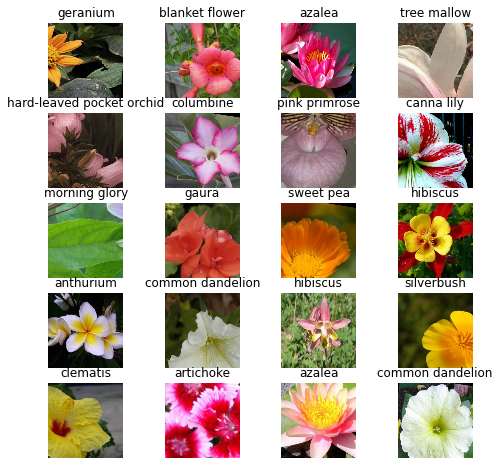

In [74]:
plot_img()

# Helper Function

In [75]:
def accuracy(output, target, is_test=False):
    global total
    global correct
    batch_size = target.size(0)
    total += batch_size    
    _, pred = output.max(dim=1)
    if is_test:
        preds.extend(pred)
    correct += torch.sum(pred == target.data)
    return  (correct.float()/total) * 100

In [76]:
def reset():
    global total, correct
    global train_loss, test_loss, best_acc
    global trn_losses, trn_accs, val_losses, val_accs
    total, correct = 0, 0
    train_loss, test_loss, best_acc = 0.0, 0.0, 0.0
    trn_losses, trn_accs, val_losses, val_accs = [], [], [], []

In [77]:
class AvgStats(object):
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.losses =[]
        self.precs =[]
        self.its = []
        
    def append(self, loss, prec, it):
        self.losses.append(loss)
        self.precs.append(prec)
        self.its.append(it)

In [78]:
def save_checkpoint(model, is_best, filename='./checkpoint.pth.tar'):
    """Save checkpoint if a new best is achieved"""
    if is_best:
        torch.save(model.state_dict(), filename)  # save checkpoint
    else:
        print ("=> Validation Accuracy did not improve")

In [79]:
def load_checkpoint(model, filename = './checkpoint.pth.tar'):
    sd = torch.load(filename, map_location=lambda storage, loc: storage)
    names = set(model.state_dict().keys())
    for n in list(sd.keys()): 
        if n not in names and n+'_raw' in names:
            if n+'_raw' not in sd: sd[n+'_raw'] = sd[n]
            del sd[n]
    model.load_state_dict(sd)

# Cyclic Learning Rate

In [80]:
class CLR(object):
    """
    The method is described in paper : https://arxiv.org/abs/1506.01186 to find out optimum 
    learning rate. The learning rate is increased from lower value to higher per iteration 
    for some iterations till loss starts exploding.The learning rate one power lower than 
    the one where loss is minimum is chosen as optimum learning rate for training.

    Args:
        optim   Optimizer used in training.

        bn      Total number of iterations used for this test run.
                The learning rate increasing factor is calculated based on this 
                iteration number.

        base_lr The lower boundary for learning rate which will be used as
                initial learning rate during test run. It is adviced to start from
                small learning rate value like 1e-4.
                Default value is 1e-5

        max_lr  The upper boundary for learning rate. This value defines amplitude
                for learning rate increase(max_lr-base_lr). max_lr value may not be 
                reached in test run as loss may explode before reaching max_lr.
                It is adviced to use higher value like 10, 100.
                Default value is 100.

    """
    def __init__(self, optim, bn, base_lr=1e-7, max_lr=100):
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.optim = optim
        self.bn = bn - 1
        ratio = self.max_lr/self.base_lr
        self.mult = ratio ** (1/self.bn)
        self.best_loss = 1e9
        self.iteration = 0
        self.lrs = []
        self.losses = []
        
    def calc_lr(self, loss):
        self.iteration +=1
        if math.isnan(loss) or loss > 4 * self.best_loss:
            return -1
        if loss < self.best_loss and self.iteration > 1:
            self.best_loss = loss
            
        mult = self.mult ** self.iteration
        lr = self.base_lr * mult
        
        self.lrs.append(lr)
        self.losses.append(loss)
        
        return lr
        
    def plot(self, start=10, end=-5):
        plt.xlabel("Learning Rate")
        plt.ylabel("Losses")
        plt.plot(self.lrs[start:end], self.losses[start:end])
        plt.xscale('log')
        
        
    def plot_lr(self):
        plt.xlabel("Iterations")
        plt.ylabel("Learning Rate")
        plt.plot(self.lrs)
        plt.yscale('log')

# Look Ahead

In [81]:
from torch.optim import Optimizer
from collections import defaultdict


class Lookahead(Optimizer):
    r'''Implements Lookahead optimizer.

    It's been proposed in paper: Lookahead Optimizer: k steps forward, 1 step back
    (https://arxiv.org/pdf/1907.08610.pdf)

    Args:
        optimizer: The optimizer object used in inner loop for fast weight updates.
        alpha:     The learning rate for slow weight update.
                   Default: 0.5
        k:         Number of iterations of fast weights updates before updating slow
                   weights.
                   Default: 5

    Example:
        > optim = Lookahead(optimizer)
        > optim = Lookahead(optimizer, alpha=0.6, k=10)
    '''
    def __init__(self, optimizer, alpha=0.5, k=5):
        assert(0.0 <= alpha <= 1.0)
        assert(k >= 1)
        self.optimizer = optimizer
        self.alpha = alpha
        self.k = k
        self.param_groups = self.optimizer.param_groups
        self.state = defaultdict(dict)
        for group in self.param_groups:
            group['k_counter'] = 0
        self.slow_weights = [[param.clone().detach() for param in group['params']] for group in self.param_groups]
    
    def step(self, closure=None):
        loss = self.optimizer.step(closure)
        for group, slow_Weight in zip(self.param_groups, self.slow_weights):
            group['k_counter'] += 1
            if group['k_counter'] == self.k:
                for param, weight in zip(group['params'], slow_Weight):
                    weight.data.add_(self.alpha, (param.data - weight.data))
                    param.data.copy_(weight.data)
                group['k_counter'] = 0

        return loss

    def state_dict(self):
        fast_dict = self.optimizer.state_dict()
        fast_state = fast_dict['state']
        param_groups = fast_dict['param_groups']
        slow_state = {(id(k) if isinstance(k, torch.Tensor) else k): v
                        for k, v in self.state.items()}
        return {
            'fast_state': fast_state,
            'param_groups': param_groups,
            'slow_state': slow_state
        }

    def load_state_dict(self, state_dict):
        fast_dict = {
            'state': state_dict['fast_state'],
            'param_groups': state_dict['param_groups']
        }
        slow_dict = {
            'state': state_dict['slow_state'],
            'param_groups': state_dict['param_groups']
        }
        super(Lookahead, self).load_state_dict(slow_dict)
        self.optimizer.load_state_dict(fast_dict)

# Initialize Variable

In [82]:
train_loss = 0.0
test_loss = 0.0
best_acc = 0.0
trn_losses = []
trn_accs = []
val_losses = []
val_accs = []

In [83]:
total = 0
correct = 0

# LR Find

In [84]:
def update_lr(optimizer, lr):
    for g in optimizer.param_groups:
        g['lr'] = lr

In [85]:
def lr_find(clr, model, optimizer=None):
    t = tqdm.tqdm(trainloader, leave=False, total=len(trainloader))
    running_loss = 0.
    avg_beta = 0.98
    model.train()
    for i, (input, target) in enumerate(t):
        input, target = input.to(device), target.to(device)
        var_ip, var_tg = Variable(input), Variable(target)
        output = model(var_ip)
        loss = criterion(output, var_tg)
    
        running_loss = avg_beta * running_loss + (1-avg_beta) *loss.item()
        smoothed_loss = running_loss / (1 - avg_beta**(i+1))
        t.set_postfix(loss=smoothed_loss)
    
        lr = clr.calc_lr(smoothed_loss)
        if lr == -1 :
            break
        update_lr(optimizer, lr)   
    
        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Train and Test

In [86]:
def train(epoch=0, model=None, optimizer=None):
    model.train()
    global best_acc
    global trn_accs, trn_losses
    is_improving = True
    counter = 0
    running_loss = 0.
    avg_beta = 0.98
    for i, (input, target) in enumerate(trainloader):
        bt_start = time.time()
        input, target = input.to(device), target.to(device)
        var_ip, var_tg = Variable(input), Variable(target)
                                    
        output = model(var_ip)
        loss = criterion(output, var_tg)
            
        running_loss = avg_beta * running_loss + (1-avg_beta) *loss.item()
        smoothed_loss = running_loss / (1 - avg_beta**(i+1))
        
        trn_losses.append(smoothed_loss)
            
        # measure accuracy and record loss
        prec = accuracy(output.data, target)
        trn_accs.append(prec)

        train_stats.append(smoothed_loss, prec, time.time()-bt_start)
        if prec > best_acc :
            best_acc = prec
            save_checkpoint(model, True)

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [87]:
def test(model=None):
    with torch.no_grad():
        model.eval()
        global val_accs, val_losses
        running_loss = 0.
        avg_beta = 0.98
        for i, (input, target) in enumerate(validloader):
            bt_start = time.time()
            input, target = input.to(device), target.to(device)
            var_ip, var_tg = Variable(input), Variable(target)
            output = model(var_ip)
            loss = criterion(output, var_tg)
        
            running_loss = avg_beta * running_loss + (1-avg_beta) *loss.item()
            smoothed_loss = running_loss / (1 - avg_beta**(i+1))

            # measure accuracy and record loss
            prec = accuracy(output.data, target, is_test=True)
            test_stats.append(loss.item(), prec, time.time()-bt_start)
        
            val_losses.append(smoothed_loss)
            val_accs.append(prec)

In [88]:
def fit(model=None, sched=None, optimizer=None):
    print("Epoch\tTrn_loss\tVal_loss\tTrn_acc\t\tVal_acc")
    for j in range(epoch):
        train(epoch=j, model=model, optimizer=optimizer)
        test(model)
        if sched:
            sched.step(j)
        print("{}\t{:06.8f}\t{:06.8f}\t{:06.8f}\t{:06.8f}"
              .format(j+1, trn_losses[-1], val_losses[-1], trn_accs[-1], val_accs[-1]))

# Model and Training

In [89]:
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [90]:
model.fc = nn.Linear(in_features=model.fc.in_features, out_features=102)

In [91]:
for param in model.parameters():
    param.require_grad = False
    
for param in model.fc.parameters():
    param.require_grad = True
    
model = model.to(device)

In [92]:
save_checkpoint(model, True, 'before_start_resnet50.pth.tar')

In [93]:
criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-4)
optimizer = Lookahead(optim)

In [94]:
clr = CLR(optim, len(trainloader))

In [95]:
lr_find(clr, model, optim)

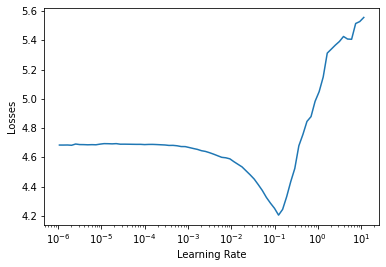

In [96]:
clr.plot()

In [97]:
load_checkpoint(model, 'before_start_resnet50.pth.tar')

In [98]:
preds = []
epoch = 30
train_stats = AvgStats()
test_stats = AvgStats()

In [99]:
reset()

In [100]:
criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-4)
optimizer = Lookahead(optim)

In [101]:
fit(model=model, optimizer=optimizer)

Epoch	Trn_loss	Val_loss	Trn_acc		Val_acc


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)


1	2.03222602	1.59891833	47.51992035	49.44901276
2	0.65459040	0.81018540	65.35515594	66.20867157
3	0.37883261	0.47625070	73.79801941	74.45018005
4	0.28398359	0.40434067	78.73517609	79.15329742
5	0.24571441	0.34416983	81.82340240	82.09233856
6	0.21548014	0.30729264	83.93341827	84.11679840
7	0.17735371	0.36604588	85.61926270	85.69635010
8	0.18954983	0.31692157	86.71447754	86.78337097
9	0.14082723	0.27323314	87.73878479	87.82877350
10	0.19313664	0.30236551	88.55101776	88.61068726
11	0.17191457	0.32415624	89.22518921	89.25677490
12	0.16940752	0.28309924	89.78331757	89.81727600
13	0.15051078	0.24121135	90.25461578	90.28724670
14	0.10504818	0.24846865	90.72232819	90.74786377
15	0.14387530	0.28174374	91.11111450	91.12474823
16	0.10681400	0.25345336	91.44998169	91.46846771
17	0.14081972	0.31037169	91.75527954	91.75781250
18	0.14115576	0.24537390	91.98887634	92.00492859
19	0.10984917	0.26123261	92.23173523	92.24071503
20	0.11262852	0.20345610	92.47400665	92.49127960
21	0.09833880	0.20265353	92.7

In [102]:
save_checkpoint(model, True, 'before_unfreeze_resnet50.pth.tar')

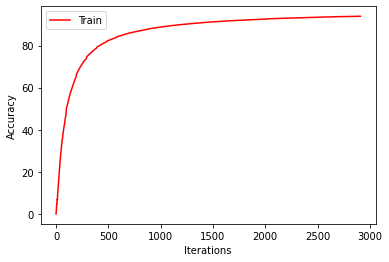

In [103]:
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(train_stats.precs, 'r', label='Train')
plt.legend()

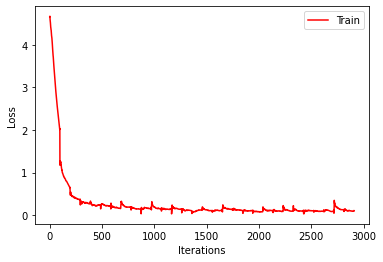

In [104]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_stats.losses, 'r', label='Train')
plt.legend()

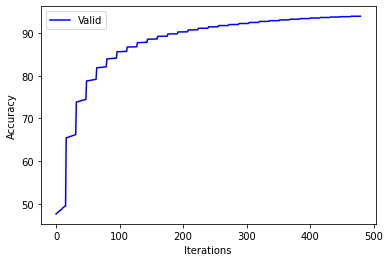

In [105]:
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(test_stats.precs, 'b', label='Valid')
plt.legend()

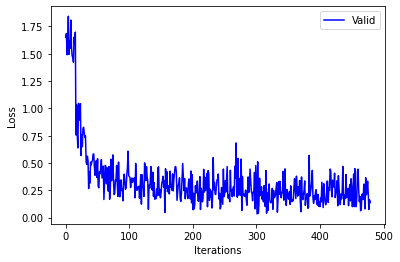

In [106]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(test_stats.losses, 'b', label='Valid')
plt.legend()

In [107]:
preds = []
train_stats = AvgStats()
test_stats = AvgStats()

In [108]:
reset()

In [109]:
for param in model.parameters():
    param.require_grad = True

In [110]:
optim = torch.optim.SGD(model.parameters(), lr=1e-6, momentum=0.9, weight_decay=1e-4)

In [111]:
clr = CLR(optim, len(trainloader), base_lr=1e-9, max_lr=10)

In [ ]:
lr_find(clr, model, optim)

 38%|███▊      | 37/97 [00:57<01:32,  1.54s/it, loss=0.0868]

In [ ]:
clr.plot(start=0)

In [ ]:
load_checkpoint(model, 'before_unfreeze_resnet50.pth.tar')

In [ ]:
preds = []
train_stats = AvgStats()
test_stats = AvgStats()

In [ ]:
reset()

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=1e-9, momentum=0.9, weight_decay=1e-4)

In [ ]:
epoch = 10

In [ ]:
fit(model=model, optimizer=optimizer)

In [ ]:
save_checkpoint(model, True, 'after_unfreeze_resnet50.pth.tar')

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_stats.losses, 'r', label='Train')
plt.legend()

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(test_stats.losses, 'b', label='Valid')
plt.legend()

In [ ]:
def predict(img, model):
    model.eval()
    with torch.no_grad():
        input = Variable(img)
        input = input.to(device)
        output = model(input)
        _, pred = output.max(dim=1)
        return pred[0].item()

In [ ]:
from PIL import Image

In [ ]:
result = dict()
for i, (input, _, path) in enumerate(testloader):
    predicted = predict(input, model)
    result[path[0]] = idx_to_class[predicted]

In [ ]:
import csv